In [18]:
import pandas as pd
import pyreadstat 
import numpy as np
import statsmodels.api as sm

In [19]:
df_diputados, meta = pyreadstat.read_sav('BASEDATOS_ARGENTINA_122_ .sav')

In [20]:
pip list

Package                   Version
------------------------- --------------
anyio                     4.2.0
argon2-cffi               21.3.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 2.4.1
async-lru                 2.0.4
attrs                     23.1.0
Babel                     2.11.0
beautifulsoup4            4.12.3
bleach                    4.1.0
Bottleneck                1.3.7
Brotli                    1.0.9
certifi                   2024.8.30
cffi                      1.16.0
charset-normalizer        3.3.2
colorama                  0.4.6
comm                      0.2.2
contourpy                 1.2.0
cycler                    0.11.0
debugpy                   1.6.7
decorator                 5.1.1
defusedxml                0.7.1
et-xmlfile                1.1.0
exceptiongroup            1.2.2
executing                 2.1.0
fastjsonschema            2.16.2
fonttools                 4.51.0
fqdn                      1.5.1
greenlet        

In [21]:
df_diputados = df_diputados.loc[~((df_diputados['ID101'] == 98) | (df_diputados['ID101'] == 99) | 
                                   (df_diputados['PRO102'] == 98) | (df_diputados['PRO112'] == 99))]

In [22]:
df_diputados.columns

Index(['Encuestado', 'País', 'legis', 'partido', 'departa', 'tipoelec',
       'comision01', 'comision02', 'comision03', 'comision04',
       ...
       'pcontacto2', 'pcontacto3', 'resultado1', 'resultado107', 'causaneg1',
       'resultado2', 'causaneg2', 'resultado3', 'causaneg3', 'peso'],
      dtype='object', length=266)

In [23]:
if 'PRO2' in df_diputados:
    print('a')
else:
    print('b')

a


In [24]:
frecuencias = df_diputados['PRO2'].value_counts()
print(frecuencias)

PRO2
5.0     77
3.0      8
8.0      5
9.0      5
6.0      3
2.0      2
1.0      1
7.0      1
12.0     1
36.0     1
18.0     1
21.0     1
24.0     1
31.0     1
42.0     1
14.0     1
Name: count, dtype: int64


In [25]:
frec_dip = df_diputados['tipoelec'].value_counts()
print(frec_dip)

tipoelec
2.0    110
Name: count, dtype: int64


In [26]:
df_diputados['DEM1'].value_counts()

DEM1
4.0    81
3.0    26
2.0     2
1.0     1
Name: count, dtype: int64

In [27]:
encuestado = df_diputados['Encuestado']

In [28]:
partido = df_diputados['partido'] # Variable independiente
eval_desempleo = df_diputados['PRO101'] # PRO101 significaría el desempleo, midiendo de 1 a 10 qué tan importante es. Según entiendo, puede que no sea así.

In [29]:
partido = sm.add_constant(partido) # Se agrega la constante para la ordenada al origen (el valor de Y cuando X=0).
pro101_segun_partido = sm.OLS(eval_desempleo, partido).fit() # Esta línea calcula la regresión lineal.
print(pro101_segun_partido.summary())


                            OLS Regression Results                            
Dep. Variable:                 PRO101   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     2.211
Date:                Mon, 28 Oct 2024   Prob (F-statistic):              0.140
Time:                        17:49:19   Log-Likelihood:                -109.61
No. Observations:                 110   AIC:                             223.2
Df Residuals:                     108   BIC:                             228.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.8407      0.129     76.070      0.0

In [30]:
massa = df_diputados['IDLN105']

In [31]:
partido = sm.add_constant(partido) # Se agrega la constante para la ordenada al origen (el valor de Y cuando X=0).
massa_segun_partido = sm.OLS(massa, partido).fit() # Esta línea calcula la regresión lineal.
print(massa_segun_partido.summary())


                            OLS Regression Results                            
Dep. Variable:                IDLN105   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     5.552
Date:                Mon, 28 Oct 2024   Prob (F-statistic):             0.0203
Time:                        17:49:19   Log-Likelihood:                -467.56
No. Observations:                 110   AIC:                             939.1
Df Residuals:                     108   BIC:                             944.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.0924      3.350      4.803      0.0

In [32]:
#disciplina de voto segun partido
disciplina = df_diputados['DIS1']


In [33]:
partido = sm.add_constant(partido) # Se agrega la constante para la ordenada al origen (el valor de Y cuando X=0).
disciplina_segun_partido = sm.OLS(disciplina, partido).fit() # Esta línea calcula la regresión lineal.
print(disciplina_segun_partido.summary())


                            OLS Regression Results                            
Dep. Variable:                   DIS1   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     6.814
Date:                Mon, 28 Oct 2024   Prob (F-statistic):             0.0103
Time:                        17:49:19   Log-Likelihood:                -106.52
No. Observations:                 110   AIC:                             217.0
Df Residuals:                     108   BIC:                             222.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9776      0.126     23.672      0.0

In [34]:
alberto = df_diputados['IDLN101']
patriciabull = df_diputados['IDLN102']
cristina = df_diputados['IDLN103']
milei = df_diputados['IDLN104']
macri = df_diputados['IDLN106']

In [35]:
import matplotlib.pyplot as plt

In [36]:
df_diputados['DIS1'].value_counts()

DIS1
3.0    88
1.0    12
2.0    10
Name: count, dtype: int64

In [37]:
partido = sm.add_constant(partido) # Se agrega la constante para la ordenada al origen (el valor de Y cuando X=0).
bullrich_segun_partido = sm.OLS(patriciabull, partido).fit() # Esta línea calcula la regresión lineal.
print(bullrich_segun_partido.summary())

                            OLS Regression Results                            
Dep. Variable:                IDLN102   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     1.685
Date:                Mon, 28 Oct 2024   Prob (F-statistic):              0.197
Time:                        17:49:20   Log-Likelihood:                -466.45
No. Observations:                 110   AIC:                             936.9
Df Residuals:                     108   BIC:                             942.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.2870      3.317      2.499      0.0

In [38]:
partido = sm.add_constant(partido) # Se agrega la constante para la ordenada al origen (el valor de Y cuando X=0).
milei_segun_partido = sm.OLS(milei, partido).fit() # Esta línea calcula la regresión lineal.
print(milei_segun_partido.summary())

                            OLS Regression Results                            
Dep. Variable:                IDLN104   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     3.069
Date:                Mon, 28 Oct 2024   Prob (F-statistic):             0.0826
Time:                        17:49:20   Log-Likelihood:                -389.62
No. Observations:                 110   AIC:                             783.2
Df Residuals:                     108   BIC:                             788.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.7951      1.649      4.726      0.0

In [39]:
df_diputados['partido'].value_counts()

partido
20.0    49
7.0     22
2.0     17
29.0    13
14.0     5
21.0     4
Name: count, dtype: int64

In [40]:
em1 = df_diputados['EM101']

In [41]:
encuestado = sm.add_constant(encuestado) # Se agrega la constante para la ordenada al origen (el valor de Y cuando X=0).
massa_segun_encuestado = sm.OLS(massa, encuestado).fit() # Esta línea calcula la regresión lineal.
print(massa_segun_encuestado.summary())

                            OLS Regression Results                            
Dep. Variable:                IDLN105   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.120
Date:                Mon, 28 Oct 2024   Prob (F-statistic):              0.292
Time:                        17:49:20   Log-Likelihood:                -469.75
No. Observations:                 110   AIC:                             943.5
Df Residuals:                     108   BIC:                             948.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.1940      3.293      1.881      0.0

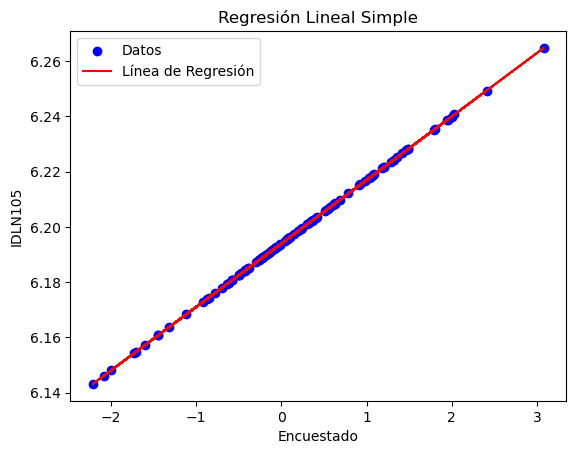

In [42]:
Encuestado = np.random.normal(size=110)
IDLN105 = 6.1940 + 0.0230 * Encuestado  # Línea de regresión basada en el coeficiente

# Gráfico de dispersión y línea de regresión
plt.scatter(Encuestado, IDLN105, color='blue', label='Datos')
plt.plot(Encuestado, 6.1940 + 0.0230 * Encuestado, color='red', label='Línea de Regresión')

# Etiquetas y título
plt.xlabel('Encuestado')
plt.ylabel('IDLN105')
plt.title('Regresión Lineal Simple')
plt.legend()

plt.show()

In [43]:
encuestado = sm.add_constant(encuestado) # Se agrega la constante para la ordenada al origen (el valor de Y cuando X=0).
em1_segun_encuestado = sm.OLS(em1, encuestado).fit() # Esta línea calcula la regresión lineal.
print(em1_segun_encuestado.summary())

                            OLS Regression Results                            
Dep. Variable:                  EM101   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                    0.1318
Date:                Mon, 28 Oct 2024   Prob (F-statistic):              0.717
Time:                        17:49:20   Log-Likelihood:                -251.30
No. Observations:                 110   AIC:                             506.6
Df Residuals:                     108   BIC:                             512.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.1597      0.452     11.418      0.0

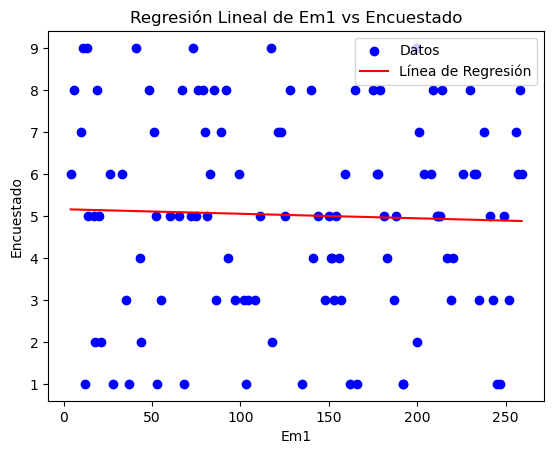

In [44]:
prediccion_em1 = em1_segun_encuestado.predict(encuestado)  # Calcula las predicciones

# Gráfico de dispersión y línea de regresión
plt.scatter(encuestado['Encuestado'], em1, color='blue', label='Datos')  # Reemplaza 'Encuestado' con el nombre correcto de la columna
plt.plot(encuestado['Encuestado'], prediccion_em1, color='red', label='Línea de Regresión')

# Etiquetas y título
plt.xlabel('Em1')
plt.ylabel('Encuestado')
plt.title('Regresión Lineal de Em1 vs Encuestado')
plt.legend()

plt.show()

In [50]:
alberto = df_diputados['IDLN101']
patriciabull = df_diputados['IDLN102']
cristina = df_diputados['IDLN103']
milei = df_diputados['IDLN104']
macri = df_diputados['IDLN106']
massa = df_diputados['IDLN105']

In [51]:
eval_fdt = df_diputados['IDP101']
eval_bullrich = df_diputados ['IDLN102']
eval_cfk = df_diputados ['IDLN103']
eval_milei = df_diputados ['IDLN104']

In [56]:
eval_fdt = df_diputados.loc[~(df_diputados['IDP101'] == 98.0) | (df_diputados['IDP101'] == 99.0)] 

In [57]:
eval_bullrich =  df_diputados.loc[~(df_diputados['IDLN102'] == 98.0) | (df_diputados['IDLN102'] == 99.0)] 
eval_cfk = df_diputados.loc[~(df_diputados['IDLN103'] == 98.0) | (df_diputados['IDLN103'] == 99.0)] 
eval_milei =  df_diputados.loc[~(df_diputados['IDLN104'] == 98.0) | (df_diputados['IDLN104'] == 99.0)] 

In [59]:
eval_bullrich_aligned = eval_bullrich.reindex(eval_fdt.index)
